In [47]:
#!pip install numpy pandas matplotlib scikit-learn tensorflow opencv-python scikit-iamge tqdm
#!jupyter nbextension enable --py widgetsnbextension

In [48]:
'''
sources

https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah
https://stackoverflow.com/questions/22081209/find-the-root-of-the-git-repository-where-the-file-lives
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/
https://github.com/jmcarpenter2/swifter
https://stackoverflow.com/questions/67183501/setting-an-array-element-with-a-sequence-requested-array-has-an-inhomogeneous-sh
https://stackoverflow.com/questions/68573041/how-to-free-up-ram-when-using-juypter-notebook

'''

'\nsources\n\nhttps://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah\nhttps://stackoverflow.com/questions/22081209/find-the-root-of-the-git-repository-where-the-file-lives\nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html\nhttps://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/\nhttps://github.com/jmcarpenter2/swifter\nhttps://stackoverflow.com/questions/67183501/setting-an-array-element-with-a-sequence-requested-array-has-an-inhomogeneous-sh\nhttps://stackoverflow.com/questions/68573041/how-to-free-up-ram-when-using-juypter-notebook\n\n'

In [49]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import matplotlib.pyplot as plt
from skimage import io
from tqdm.auto import tqdm
import concurrent.futures
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import gc

tqdm.pandas()



# Data Collection

In [50]:



directory = {}
repo_url = "https://api.github.com/repos/yiweichen04/retina_dataset/contents"
token = ''
headers = {'Authorization': f'token {token}'}

Url = 'https://github.com/yiweichen04/retina_dataset/blob/master/dataset/1_normal/NL_001.png?raw=true'

#image = convert_image_url_into_numpy_array(Url)

In [51]:
def fetch_contents(url, direct, level=0, headers=None):
    temp = []
    response = requests.get(url, headers=headers)
    contents = response.json()

    if response.status_code != 200:
        print(f"Error: {response.status_code}")
        return

    for item in contents:
        #print(' ' * level * 2 + item['name'])
        if item['type'] == 'dir':
            direct[item['name']] = {}
            fetch_contents(item['url'], direct[item['name']], level + 1, headers)
        else:
            temp.append(item['name'])

    if temp:
        direct['contents'] = temp

In [52]:
fetch_contents(repo_url, directory, headers=headers)

In [53]:
keys = directory['dataset'].keys()


for x in directory['dataset'].keys():
    for y in directory['dataset'][x]['contents']:
        pass
        #print(x,y)

In [54]:
dataset = [(y,x) for x in directory['dataset'].keys() for y in directory['dataset'][x]['contents']]

dataset = pd.DataFrame(dataset, columns=("Image", "Classification"))
dataset


,Image,Classification
0,NL_001.png,1_normal
1,NL_002.png,1_normal
2,NL_003.png,1_normal
3,NL_004.png,1_normal
4,NL_005.png,1_normal
...,...,...
596,Retina_096.png,3_retina_disease
597,Retina_097.png,3_retina_disease
598,Retina_098.png,3_retina_disease
599,Retina_099.png,3_retina_disease


In [55]:
def convert_image_url_into_numpy_array(url):
    img = io.imread(url)
    return img

def convert_filename_to_link(name, classification):
    if name != None:
        link =  f'https://github.com/yiweichen04/retina_dataset/blob/master/dataset/{classification}/{name}?raw=true'
        return convert_image_url_into_numpy_array(link)



In [56]:
# Function to process each row
def process_row(row):
    return convert_filename_to_link(row['Image'], row['Classification'])

# Use concurrent.futures to parallelize the processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Convert dataframe to list of dicts
    rows = dataset.to_dict(orient='records')
    # Use tqdm to show progress bar
    results = list(tqdm(executor.map(process_row, rows), total=len(rows)))

# Assign results back to dataframe
dataset['Image'] = results




100%|██████████| 601/601 [04:22<00:00,  2.29it/s]


In [57]:
#for column in dataset.columns:
#        #dataset[column] = dataset[column].apply(lambda x: convert_filename_to_link(column, x))
#        dataset[column] = [convert_filename_to_link(column, x) for x in tqdm(dataset[column])]


#dataset['Image'] = dataset.progress_apply(lambda row: convert_filename_to_link(row['Image'], row['Classification']), axis=1)

dataset

,Image,Classification
0,"[[[0, 0, 0], [2, 1, 1], [3, 1, 1], [3, 0, 1], ...",1_normal
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1_normal
2,"[[[0, 1, 1], [0, 1, 1], [0, 0, 0], [0, 0, 0], ...",1_normal
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1_normal
4,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 1, 0], ...",1_normal
...,...,...
596,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], ...",3_retina_disease
597,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",3_retina_disease
598,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ...",3_retina_disease
599,"[[[0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], ...",3_retina_disease


(1632, 2464, 3)


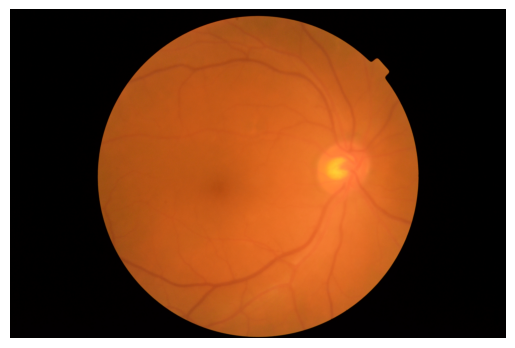

(1728, 2592, 3)


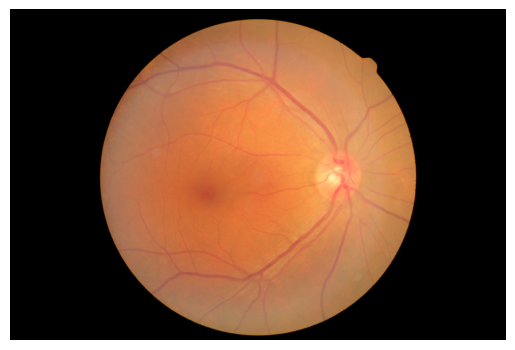

In [58]:
def show_img(image):
    print(image.shape)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

for x in dataset['Image'].sample(2):
    show_img(x)

# This is where the machine learning starts


In [59]:
label_encoder = LabelEncoder()
dataset['Classification'] = label_encoder.fit_transform(dataset['Classification'])

In [60]:
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

#train_images = np.array(train_df['Image'].tolist(), dtype=np.uint8)
#test_images = np.array(test_df['Image'].tolist(), dtype=np.uint8)
#train_labels = np.array(train_df['Classification'].tolist(), dtype=np.uint8)
#test_labels = np.array(test_df['Classification'].tolist(), dtype=np.uint8)

In [61]:
train_df

,Image,Classification
9,"[[[1, 0, 0], [1, 0, 0], [1, 0, 1], [2, 0, 1], ...",0
375,"[[[0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], ...",1
523,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3
188,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ...",0
131,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], ...",0
...,...,...
71,"[[[2, 0, 1], [2, 0, 1], [3, 0, 1], [3, 0, 1], ...",0
106,"[[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
270,"[[[0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
435,"[[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2


In [62]:
test_df

,Image,Classification
110,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
419,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
565,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3
77,"[[[1, 1, 1], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...",0
181,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...",0
...,...,...
340,"[[[0, 0, 0], [0, 0, 0], [0, 1, 0], [0, 1, 0], ...",1
148,"[[[2, 0, 1], [2, 1, 1], [1, 1, 1], [0, 0, 1], ...",0
494,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
439,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 1, 0], ...",2


In [63]:
height, width, temp = train_df['Image'][0].shape
target_size = (int(height), int(width))
print(target_size)

def preprocess_image(image, target_size=target_size):

    image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)
    norm_img = cv2.normalize(enhanced_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img

(1632, 2464)


In [64]:
train_images = np.array([preprocess_image(img) for img in tqdm(train_df['Image'])], dtype=np.uint8)
test_images = np.array([preprocess_image(img) for img in tqdm(test_df['Image'])], dtype=np.uint8)

100%|██████████| 121/121 [00:01<00:00, 105.13it/s]


In [65]:
train_images

array([[[2, 2, 6, ..., 2, 2, 2],
        [2, 2, 6, ..., 2, 2, 2],
        [2, 2, 6, ..., 6, 2, 2],
        ...,
        [6, 6, 6, ..., 6, 2, 2],
        [6, 6, 6, ..., 6, 2, 2],
        [6, 6, 6, ..., 6, 6, 2]],

       [[3, 3, 3, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 3, 0],
        [3, 0, 0, ..., 0, 3, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]],

       ...,

       [[3, 0, 0, ..., 3, 0, 0],
        [0, 0, 0, ..., 3, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [3, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0]],

       [[3, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [66]:
# Ensure that labels are numpy arrays of appropriate type
train_labels = np.array(train_df['Classification'].tolist(), dtype=np.int64)
test_labels = np.array(test_df['Classification'].tolist(), dtype=np.int64)

In [67]:
height, width = target_size
train_images = train_images.reshape(-1, height, width, 1)
test_images = test_images.reshape(-1, height, width, 1)

In [68]:
# Define the image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [69]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for gpu in gpus:
            print("here")
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

[]
Num GPUs Available:  0


In [70]:

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

c:\Users\Panpan Salacut\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[15954176,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:StatelessRandomUniformV2] name: 

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=30, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)